In [10]:
# Import Libraries
import os , sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway ,ttest_ind, ttest_rel,zscore

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Reload the data
audio_data = pd.read_csv('Data/Audio_data.csv')
npc_data = pd.read_csv('Data/NPC_data.csv')
poster_data = pd.read_csv('Data/Poster_data.csv')

# Normalise the pre and post scores while keeping the Subject information
audio_data_normalized = audio_data.copy()
npc_data_normalized = npc_data.copy()
poster_data_normalized = poster_data.copy()

# Apply Z-score normalization to pre and post scores separately for each dataset
for col in audio_data.columns:
    if 'pre' in col or 'post' in col:
        audio_data_normalized[col] = zscore(audio_data[col])
        npc_data_normalized[col] = zscore(npc_data[col])
        poster_data_normalized[col] = zscore(poster_data[col])


In [12]:
# For Audio data
audio_normalized = audio_data.iloc[:, 1:].apply(zscore)  # Apply z-score across columns, skip the 'Subject' column
audio_normalized['Subject'] = audio_data['Subject']  # Add the 'Subject' column back
audio_normalized['Dataset'] = 'Audio'  # Add a 'Dataset' column

# For NPC data
npc_normalized = npc_data.iloc[:, 1:].apply(zscore)  # Apply z-score across columns, skip the 'Subject' column
npc_normalized['Subject'] = npc_data['Subject']  # Add the 'Subject' column back
npc_normalized['Dataset'] = 'NPC'  # Add a 'Dataset' column

# For Poster data
poster_normalized = poster_data.iloc[:, 1:].apply(zscore)  # Apply z-score across columns, skip the 'Subject' column
poster_normalized['Subject'] = poster_data['Subject']  # Add the 'Subject' column back
poster_normalized['Dataset'] = 'Poster'  # Add a 'Dataset' column

# Combine all normalized scores into one dataframe
combined_normalized_data = pd.concat([audio_normalized, npc_normalized, poster_normalized], ignore_index=True)

# Rearrange columns to match the desired structure
column_order = ['Subject', 'pre-affective', 'pre-cognitive', 'pre-connative', 'pre-PEB',
                'post-affective', 'post-cognitive', 'post-connative', 'post-PEB', 'Dataset']
combined_normalized_data = combined_normalized_data[column_order]

combined_normalized_data.head()


,Subject,pre-affective,pre-cognitive,pre-connative,pre-PEB,post-affective,post-cognitive,post-connative,post-PEB,Dataset
0,Student1,0.586494,0.000000,-0.040193,-0.977625,-1.066169,0.948292,1.134768,1.335265,Audio
1,Student2,-1.103691,1.290994,1.567542,-1.912839,-0.185479,-0.201153,-1.370239,1.335265,Audio
2,Student3,-2.219213,0.000000,0.763674,-0.673137,-0.185479,-1.350597,-0.543587,-0.387657,Audio
3,Student4,0.028733,0.000000,0.763674,1.197292,-1.066169,-0.775875,-0.543587,-0.387657,Audio
4,Student5,-1.103691,1.290994,-1.647929,-0.368648,-1.066169,-0.775875,-0.543587,-2.972040,Audio


In [13]:
# Paired t-test

# Audio Data
audio_pre_peb = audio_data['pre-PEB']
audio_post_peb = audio_data['post-PEB']
t_stat_audio, p_value_audio = ttest_rel(audio_pre_peb, audio_post_peb)

# NPC data
npc_pre_peb = npc_data['pre-PEB']
npc_post_peb = npc_data['post-PEB']
t_stat_npc, p_value_npc = ttest_rel(npc_pre_peb, npc_post_peb)

# Poster data
poster_pre_peb = poster_data['pre-PEB']
poster_post_peb = poster_data['post-PEB']
t_stat_poster, p_value_poster = ttest_rel(poster_pre_peb, poster_post_peb)

# Collecting results
results = {
    'Audio': {'t_stat': t_stat_audio, 'p_value': p_value_audio},
    'NPC': {'t_stat': t_stat_npc, 'p_value': p_value_npc},
    'Poster': {'t_stat': t_stat_poster, 'p_value': p_value_poster}
}


results_df = pd.DataFrame(results).T
results_df['p_value'] = results_df['p_value'].round(4)
results_df['t_stat'] = results_df['t_stat'].round(4)
results_df

,t_stat,p_value
Audio,0.1306,0.8974
NPC,0.7410,0.4678
Poster,-2.4030,0.0266


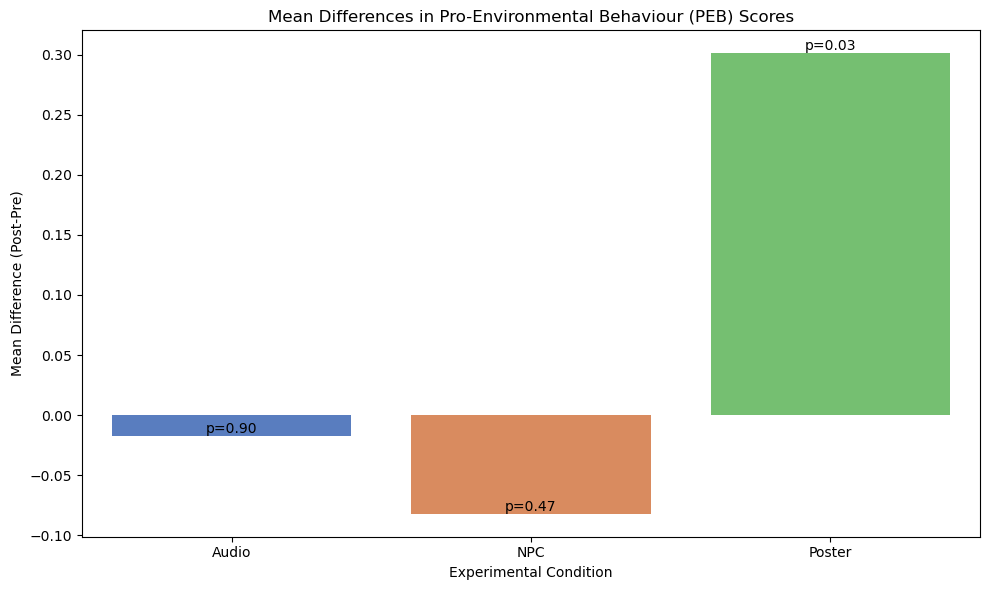

({'Audio': {'t_stat': 0.1306348408023648, 'p_value': 0.8974374137373855},
  'NPC': {'t_stat': 0.7409783619625421, 'p_value': 0.4677663238673544},
  'Poster': {'t_stat': -2.4029706601732665, 'p_value': 0.026639916856583762}},
   Dataset  Mean Difference   P-Value
 0   Audio           -0.017  0.897437
 1     NPC           -0.082  0.467766
 2  Poster            0.301  0.026640)

In [14]:
# For storytelling visualization, we will prepare data to show the mean differences between pre and post-PEB scores
mean_differences = {
    'Dataset': ['Audio', 'NPC', 'Poster'],
    'Mean Difference': [
        audio_post_peb.mean() - audio_pre_peb.mean(),
        npc_post_peb.mean() - npc_pre_peb.mean(),
        poster_post_peb.mean() - poster_pre_peb.mean()
    ],
    'P-Value': [p_value_audio, p_value_npc, p_value_poster]
}

mean_differences_df = pd.DataFrame(mean_differences)

# Visualizing the mean differences with p-values
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Mean Difference', data=mean_differences_df, palette='muted')
plt.title('Mean Differences in Pro-Environmental Behaviour (PEB) Scores')

# Annotating p-values
for i in range(mean_differences_df.shape[0]):
    plt.text(i, mean_differences_df['Mean Difference'][i], f'p={mean_differences_df["P-Value"][i]:.2f}', 
             ha='center', va='bottom')

plt.xlabel('Experimental Condition')
plt.ylabel('Mean Difference (Post-Pre)')
plt.tight_layout()
plt.show()

results, mean_differences_df

- Audio: t-statistic ≈ 0.131, p-value ≈ 0.897, indicating no significant difference in PEB scores pre and post-experiment.
- NPC: t-statistic ≈ 0.741, p-value ≈ 0.468, also indicating no significant difference in PEB scores pre and post-experiment.
- Poster: t-statistic ≈ -2.403, p-value ≈ 0.027, indicating a significant difference in PEB scores pre and post-experiment.-

In [ ]:
# One-way ANOVA
# Perform one-way ANOVA for pre-PEB scores across the three experimental conditions
f_statistic, p_value = f_oneway(audio_data['pre-PEB'], npc_data['pre-PEB'], poster_data['pre-PEB'])

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Combine the data for ANCOVA analysis, focusing on PEB scores
ancova_data = pd.concat([
    audio_data[['Subject', 'pre-PEB', 'post-PEB']].assign(Dataset='Audio'),
    npc_data[['Subject', 'pre-PEB', 'post-PEB']].assign(Dataset='NPC'),
    poster_data[['Subject', 'pre-PEB', 'post-PEB']].assign(Dataset='Poster')
])

# Performing ANCOVA
# ancova_model = ols('post-PEB ~ C(Dataset) + pre-PEB', data=ancova_data.rename(columns={"post-PEB": "post_PEB", "pre-PEB": "pre_PEB"})).fit()
# ancova_results = sm.stats.anova_lm(ancova_model, typ=2)  # Type 2 ANOVA DataFrame

# ancova_results

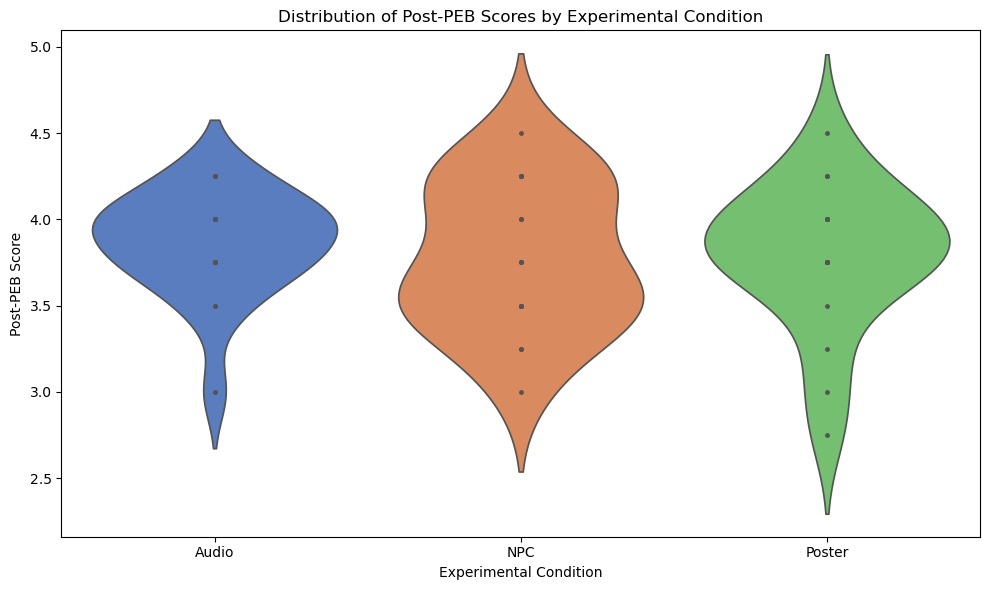

In [21]:
# Visualizing change scores with a violin plot including all markers
plt.figure(figsize=(10, 6))
sns.violinplot(x='Dataset', y='post-PEB', data=ancova_data, inner='point',  density_norm="count", palette='muted')
plt.title('Distribution of Post-PEB Scores by Experimental Condition')
plt.xlabel('Experimental Condition')
plt.ylabel('Post-PEB Score')
plt.tight_layout()
plt.show()




In [ ]:
# Conducting t-tests to compare change scores between each pair of datasets
# Comparing Audio vs NPC
audio_change_scores = ancova_data[ancova_data['Dataset'] == 'Audio']['Change Score']
npc_change_scores = ancova_data[ancova_data['Dataset'] == 'NPC']['Change Score']
t_stat_audio_npc, p_value_audio_npc = ttest_ind(audio_change_scores, npc_change_scores)

# Comparing Audio vs Poster
poster_change_scores = ancova_data[ancova_data['Dataset'] == 'Poster']['Change Score']
t_stat_audio_poster, p_value_audio_poster = ttest_ind(audio_change_scores, poster_change_scores)

# Comparing NPC vs Poster
t_stat_npc_poster, p_value_npc_poster = ttest_ind(npc_change_scores, poster_change_scores)

{
    "Audio vs NPC": {"t_stat": t_stat_audio_npc, "p_value": p_value_audio_npc},
    "Audio vs Poster": {"t_stat": t_stat_audio_poster, "p_value": p_value_audio_poster},
    "NPC vs Poster": {"t_stat": t_stat_npc_poster, "p_value": p_value_npc_poster}
}

In [ ]:
#regression analysis
ancova_data['Dataset_cat'] = ancova_data['Dataset'].astype('category').cat.codes
# Fixing the formula by removing backticks and correctly referencing the dataset category for the regression analysis
regression_model_fixed = ols('post_PEB ~ pre_PEB * C(Dataset)', data=ancova_data.rename(columns={"post-PEB": "post_PEB", "pre-PEB": "pre_PEB"})).fit()

# Displaying the regression model summary for detailed insights
regression_summary_fixed = regression_model_fixed.summary()

# Convert to DataFrame
regression_summary_fixed_df = pd.read_html(regression_summary_fixed.tables[1].as_html(), header=0, index_col=0)[0]
regression_summary_fixed_df


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.1023,0.733,5.599,0.000,2.633,5.571
C(Dataset)[T.NPC],-0.8757,1.331,-0.658,0.513,-3.543,1.792
C(Dataset)[T.Poster],-1.1021,0.956,-1.153,0.254,-3.019,0.815
pre_PEB,-0.0618,0.188,-0.330,0.743,-0.438,0.314
pre_PEB:C(Dataset)[T.NPC],0.2040,0.343,0.595,0.554,-0.484,0.891
pre_PEB:C(Dataset)[T.Poster],0.2876,0.256,1.123,0.266,-0.226,0.801
